In [12]:
import collections
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
#from keras.applications.inception_v3 import InceptionV3
#import keras.backend as K
#from keras.callbacks import Callback
from sklearn import metrics
import datetime
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import io
from skimage.transform import resize
#from skimage import color
#from skimage import io
#from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
#from sklearn.model_selection import StratifiedKFold
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import plot_confusion_matrix
import imgaug.augmenters as im_aug
#from tflearn.layers.core import input_data, dropout, fully_connected

%matplotlib inline
print("finish loading!")

finish loading!


In [13]:
from google.colab import drive # get the access from google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
# Set the right path to the data
path_var_train = '/content/drive/MyDrive/Colab Notebooks/train/' 
#count the number of images in the folder
path_train, dirs_train, files_train = next(os.walk(path_var_train))
number_images_train = len(files_train)
print(number_images_train)
print(files_train)

476
['Depuy.174.jpg', 'Cofield.59.jpg', 'Cofield.5.jpg', 'Depuy.187.jpg', 'Cofield.67.jpg', 'Depuy.145.jpg', 'Cofield.49.jpg', 'Cofield.9.jpg', 'Cofield.25.jpg', 'Depuy.107.jpg', 'Depuy.198.jpg', 'Depuy.138.jpg', 'Depuy.110.jpg', 'Depuy.154.jpg', 'Cofield.39.jpg', 'Depuy.146.jpg', 'Depuy.164.jpg', 'Cofield.29.jpg', 'Cofield.36.jpg', 'Depuy.168.jpg', 'Depuy.188.jpg', 'Depuy.169.jpg', 'Depuy.150.jpg', 'Cofield.27.jpg', 'Cofield.17.jpg', 'Depuy.202.jpg', 'Depuy.122.jpg', 'Depuy.192.jpg', 'Depuy.151.jpg', 'Cofield.52.jpg', 'Depuy.103.jpg', 'Depuy.193.jpg', 'Depuy.172.jpg', 'Depuy.161.jpg', 'Depuy.105.jpg', 'Cofield.19.jpg', 'Cofield.40.jpg', 'Cofield.28.jpg', 'Depuy.211.jpg', 'Cofield.51.jpg', 'Depuy.182.jpg', 'Depuy.197.jpg', 'Depuy.163.jpg', 'Depuy.16.jpg', 'Depuy.201.jpg', 'Depuy.15.jpg', 'Depuy.200.jpg', 'Depuy.108.jpg', 'Depuy.118.jpg', 'Cofield.20.jpg', 'Depuy.12.jpg', 'Depuy.196.jpg', 'Cofield.34.jpg', 'Cofield.13.jpg', 'Depuy.19.jpg', 'Depuy.184.jpg', 'Depuy.207.jpg', 'Depuy.181.jp

In [15]:
# Set the right path to the data
path_var_tst = '/content/drive/MyDrive/Colab Notebooks/test/' 
#count the number of images in the folder
path_tst, dirs_tst, files_tst = next(os.walk(path_var_tst))
number_images_tst = len(files_tst)
print(number_images_tst)

121


In [16]:
import random
 
random.shuffle(files_train)

files_train


['Depuy.142.jpg',
 'Depuy.36.jpg',
 'Tornier.4.jpg',
 'Depuy.174.jpg',
 'Depuy.18.jpg',
 'Zimmer.102.jpg',
 'Cofield.57.jpg',
 'Cofield.66.jpg',
 'Zimmer.14.jpg',
 'Depuy.40.jpg',
 'Tornier.7.jpg',
 'Depuy.51.jpg',
 'Tornier.10.jpg',
 'Zimmer.15.jpg',
 'Depuy.9.jpg',
 'Zimmer.55.jpg',
 'Depuy.83.jpg',
 'Zimmer.77.jpg',
 'Zimmer.28.jpg',
 'Cofield.20.jpg',
 'Zimmer.74.jpg',
 'Tornier.56.jpg',
 'Cofield.3.jpg',
 'Zimmer.21.jpg',
 'Depuy.76.jpg',
 'Depuy.110.jpg',
 'Depuy.176.jpg',
 'Cofield.37.jpg',
 'Zimmer.46.jpg',
 'Depuy.49.jpg',
 'Zimmer.22.jpg',
 'Cofield.62.jpg',
 'Depuy.175.jpg',
 'Depuy.72.jpg',
 'Depuy.233.jpg',
 'Cofield.1.jpg',
 'Depuy.224.jpg',
 'Depuy.59.jpg',
 'Tornier.16.jpg',
 'Tornier.29.jpg',
 'Depuy.167.jpg',
 'Depuy.191.jpg',
 'Tornier.32.jpg',
 'Depuy.141.jpg',
 'Depuy.123.jpg',
 'Zimmer.87.jpg',
 'Zimmer.42.jpg',
 'Depuy.220.jpg',
 'Zimmer.40.jpg',
 'Depuy.228.jpg',
 'Depuy.8.jpg',
 'Cofield.21.jpg',
 'Depuy.184.jpg',
 'Zimmer.98.jpg',
 'Depuy.45.jpg',
 'Zimmer.45.

In [17]:
#

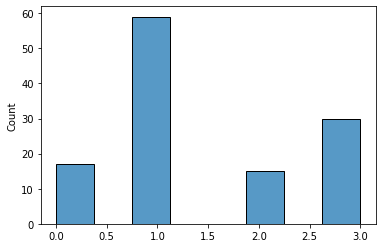

In [18]:
# convert real image to numpy array
images_tst= np.ndarray(shape = (number_images_tst, 224,224,3), dtype = np.float32) # load image in the standard format
labels_tst = np.ndarray(shape = (number_images_tst)) # store labels
image_names_tst = [] # store image name

i = 0
# Loop through all files in folder, grabbing labels and images
for file in files_tst:
  if file.split('.')[0] == 'Cofield':
    labels_tst [i] = 0
  elif file.split('.')[0] == 'Depuy':
    labels_tst [i] = 1
  elif file.split('.')[0] == 'Tornier':
    labels_tst [i] = 2
  elif file.split('.')[0] == 'Zimmer':
    labels_tst [i] = 3
  #read in the image
  pic = plt.imread(path_var_tst + file,format='jpg') #　format rgb
  #resize the image to the standard dimension
  pic = resize(pic,(224,224,3))
  images_tst[i] = pic # store raw image
  image_names_tst.append(file)
  i += 1

name_map = collections.defaultdict()
name_map[0] = 'Cofield'
name_map[1] = 'Depuy'
name_map[2] = 'Tornier'
name_map[3] = 'Zimmer'
sns.histplot(labels_tst )

In [19]:
from matplotlib import image
from imgaug.imgaug import imshow
#path_var = '/content/drive/MyDrive/data/'
number_images = len(files_train)

# eight additional augmented images  
images = np.ndarray(shape = (number_images*5, 224,224,3), dtype = np.float32)
labels = np.ndarray(shape = (number_images*5))
# lets store the names of the images as well
image_names = []

# Image Augmentation

# apply a rotation on each image.
rotate = im_aug.Affine(rotate=(0, 360)) # 0~360 degree random rotation

# apply a translation on each image.
translate = im_aug.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}) # translate on x and y axis independently for up tp 20% shift

# Apply a cropping to each image. Random crop 10% to 25% of the image
cropping = im_aug.size.Crop(percent=(0.10, 0.25))


# introduce random white noise to the image with mean = 0, std = 1.1
noise = im_aug.AdditiveGaussianNoise(loc=0, scale=(0, 1.1), per_channel=0.5)



i = 0;
# Looping through all files in folder
for file in files_train:
 
  # apply augmentation
    label = 0
    if file.split('.')[0] == 'Cofield':
      label = 0
    elif file.split('.')[0] == 'Depuy':
      label = 1
    elif file.split('.')[0] == 'Tornier':
      label = 2
    elif file.split('.')[0] == 'Zimmer':
      label = 3
    #read in the image
    pic = plt.imread(path_var_train + file, format='jpg')
    #resize the image to the standard dimension
    pic = resize(pic,(224,224,3)).astype(np.float32)
   
    # 1
    images[i] = pic # original image
    labels[i] = label
    image_names.append(file)
    i += 1

    # 2
    rotate_im = rotate.augment_image(pic)
    images[i] = rotate_im
    labels[i] = label
    i += 1
  
    # 3
    translate_im = translate.augment_image(pic)
    images[i] = translate_im
    labels[i] = label
    i += 1

    # 4
    cropping_im = cropping.augment_image(pic)
    images[i] = cropping_im
    labels[i] = label
    i += 1  

    # 5
     # Flip the image H & V 
    flip_lr =cv2.flip(pic, -1)
    images[i] = flip_lr
    labels[i] = label
    i += 1
   
    

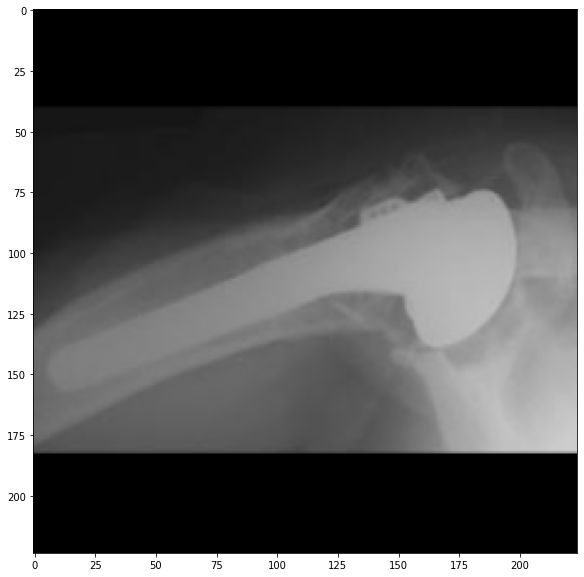

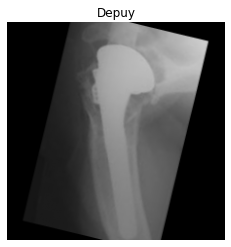

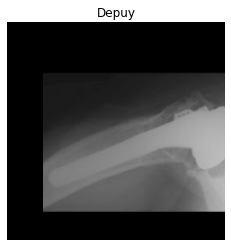

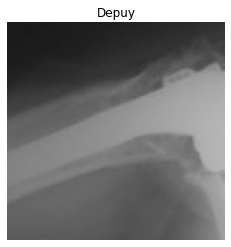

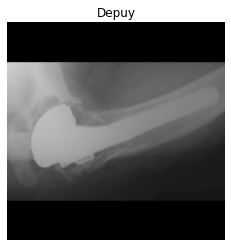

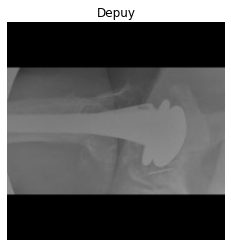

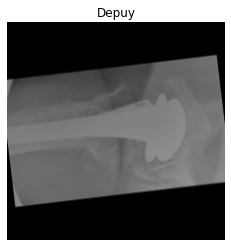

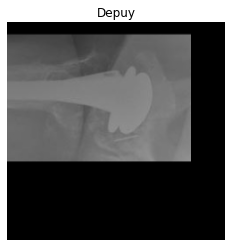

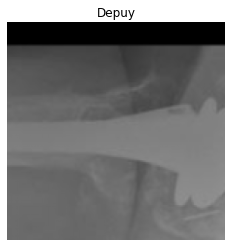

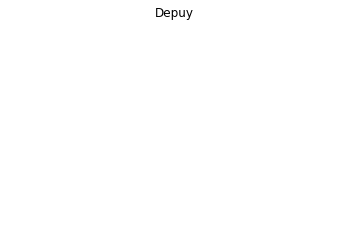

In [20]:
plt.figure(figsize=(10, 10))
for i in range(9):
  #ax = plt.subplot(3, 3, i%5 + 1)
  plt.imshow(images[i])
  plt.show()
  plt.title(name_map[int(labels[i])])
  plt.axis("off")

In [21]:
print(images.shape, labels.shape) 

(2380, 224, 224, 3) (2380,)


In [22]:
train_normlization=[]
print(len(images))
for i in images: 
  v=np.mean(i)
  f=np.std(i)
  equ=(i-v)/f
 # equ=(i/255.0)
  train_normlization.append(equ)

2380


In [23]:
tst_normlization=[]
for i in images_tst: 
  v=np.mean(i)
  f=np.std(i)
  equ=(i-v)/f
  #equ=(i/255.0)
 # plt.imshow(equ)
  #plt.show()
  tst_normlization.append(equ)
print(len(tst_normlization))

121


In [24]:
from tensorflow.keras import regularizers
model_1 = tf.keras.models.Sequential(
[# tf.keras.layers.input_data(input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(32, 3, activation="relu",input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2), # padding can also be 'same'
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
 # tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(128,3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
 #tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.5)),
  tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.5)), # binary activation output
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.5))
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [26]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_normlization=np.array(train_normlization)
tst_normlization=np.array(tst_normlization)
history_1 = model_1.fit( train_normlization,labels,epochs=10,validation_data=(tst_normlization,labels_tst))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


75/75 [==============================] - 11s 113ms/step - loss: 1.4034 - accuracy: 0.4937 - val_loss: 1.3928 - val_accuracy: 0.4876
Epoch 2/10
75/75 [==============================] - 8s 105ms/step - loss: 1.3797 - accuracy: 0.4937 - val_loss: 1.3928 - val_accuracy: 0.4876
Epoch 3/10
75/75 [==============================] - 8s 106ms/step - loss: 1.3505 - accuracy: 0.4937 - val_loss: 1.3304 - val_accuracy: 0.4876
Epoch 4/10
75/75 [==============================] - 8s 106ms/step - loss: 1.3204 - accuracy: 0.4937 - val_loss: 1.3185 - val_accuracy: 0.4876
Epoch 5/10
75/75 [==============================] - 8s 107ms/step - loss: 1.3081 - accuracy: 0.4937 - val_loss: 1.3075 - val_accuracy: 0.4876
Epoch 6/10
75/75 [==============================] - 8s 105ms/step - loss: 1.2792 - accuracy: 0.4937 - val_loss: 1.2590 - val_accuracy: 0.4876
Epoch 7/10
75/75 [==============================] - 8s 105ms/step - loss: 1.2602 - accuracy: 0.4937 - val_loss: 1.3435 - val_accuracy: 0.4876
Epoch 8/10
75/75

In [27]:
model_1.evaluate(tst_normlization, labels_tst)

4/4 [==============================] - 1s 230ms/step - loss: 1.2746 - accuracy: 0.4876


[1.2745565176010132, 0.4876033067703247]

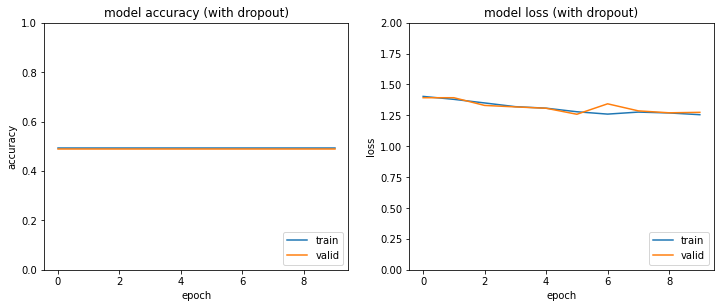

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,3)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy (with dropout)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,4)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss (with dropout)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.ylim([0,2])
plt.show()